In [1]:
%pwd

'd:\\INTERNSHIP\\AI_Chatbot_using_LLM\\backend\\research'

In [2]:
import os 
os.chdir("../")

In [3]:
import os
from langgraph.graph import StateGraph , START , END
from typing import TypedDict , Annotated , Literal
import operator
from langchain_groq import ChatGroq
from pydantic import BaseModel , Field


from src.AI_Chatbot_using_LLMs.core.model_loader import call_llm

from dotenv import load_dotenv
load_dotenv()

d:\INTERNSHIP\AI_Chatbot_using_LLM\backend\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


True

In [4]:
%pwd

'd:\\INTERNSHIP\\AI_Chatbot_using_LLM\\backend'

# TypedDict Model

In [5]:
class ChatState(TypedDict):
    user_query: str
    domain: Literal["education", "legal", "medical", "sports"]
    provider: Literal["groq", "openai", "gemini", "hf"] 
    prompt: str
    response: str

# Nodes

In [6]:
def education_node(state):
    prompt = (
        "You are an education expert who explains concepts clearly.\n\n"
        f"User question: {state['user_query']}"
    )
    return {"prompt": prompt}

In [7]:
def legal_node(state: ChatState):
    prompt = (
            "You are a legal expert. Provide legally accurate and safe info.\n\n"
            f"User: {state['user_query']}"
    )
    return {"prompt": prompt}

In [8]:
def medical_node(state: ChatState):
    prompt = (
            "You are a medical advisor. Provide medically relevant but safe information.\n\n"
            f"User: {state['user_query']}"
    )
    return {"prompt": prompt}

In [9]:
def sports_node(state: ChatState):
    prompt = (
            "You are a sports analyst. Answer with sports-specific knowledge.\n\n"
            f"User: {state['user_query']}"
    )
    return {"prompt": prompt}

In [10]:
def route_domain(state: ChatState):
    return state["domain"]

In [11]:
def llm_node(state: ChatState):

    current_provider = state.get("provider", "groq") 
    
    response_text = call_llm(state["prompt"], provider=current_provider)
    
    return {"response": response_text}

# LangGraph Builder

In [12]:
def build_langgraph():
    graph = StateGraph(ChatState)


    graph.add_node("education", education_node)
    graph.add_node("legal", legal_node)
    graph.add_node("medical", medical_node)
    graph.add_node("sports", sports_node)

    graph.add_node("llm", llm_node)


    graph.add_conditional_edges(
        START,
        route_domain,
        {
            "education": "education",
            "legal": "legal",
            "medical": "medical",
            "sports": "sports",
        }
    )


    graph.add_edge("education", "llm")
    graph.add_edge("legal", "llm")
    graph.add_edge("medical", "llm")
    graph.add_edge("sports", "llm")


    graph.add_edge("llm", END)

    return graph.compile()

chatbot_graph = build_langgraph()
print("Graph compiled successfully.")

Graph compiled successfully.


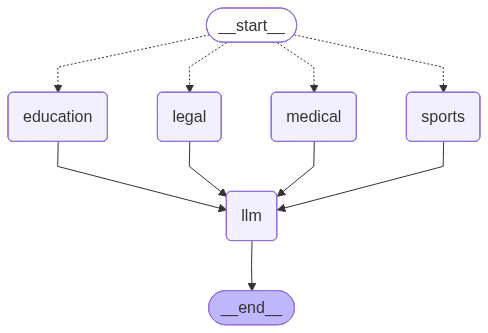

In [13]:
chatbot_graph

# Testing

In [14]:

test_state = {
    "user_query": "what is fever",
    "domain": "medical",
    "provider": "groq",
    "prompt": "",
    "response": ""
}

print("--- Running Graph ---")
result = chatbot_graph.invoke(test_state)

print(f"\nDOMAIN: {result['domain']}")
print(f"RESPONSE: {result['response']}")

--- Running Graph ---

DOMAIN: medical
RESPONSE: Fever, also known as pyrexia, is a common medical condition characterized by an elevated body temperature above the normal range. The normal body temperature is typically considered to be around 98.6°F (37°C), but it can vary slightly from person to person.

When the body temperature rises above 100.4°F (38°C), it is generally considered a fever. Fever is usually a symptom of an underlying infection or illness, and it can be caused by a variety of factors, including:

1. **Infections**: Bacterial, viral, or fungal infections, such as pneumonia, influenza, or urinary tract infections.
2. **Inflammation**: Conditions like arthritis, appendicitis, or peritonitis.
3. **Immune system disorders**: Autoimmune diseases, such as lupus or rheumatoid arthritis.
4. **Medications**: Certain medications, like antibiotics or blood pressure medications, can cause fever as a side effect.
5. **Environmental factors**: Exposure to extreme temperatures, hea